In [2]:
from mlxtend.frequent_patterns import apriori,association_rules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 

In [3]:
df=pd.read_csv('basket_analysis.csv')


In [4]:
df.head()


,Unnamed: 0,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,999.0,499.0,288.530761,0.0,249.5,499.0,748.5,998.0


In [6]:
df=df.drop('Unnamed: 0',axis=1)


In [7]:
print(df.isnull().sum())


Apple           0
Bread           0
Butter          0
Cheese          0
Corn            0
Dill            0
Eggs            0
Ice cream       0
Kidney Beans    0
Milk            0
Nutmeg          0
Onion           0
Sugar           0
Unicorn         0
Yogurt          0
chocolate       0
dtype: int64


In [8]:
key=[]
num=[]

In [9]:
for i in df.columns:
        if i =='id':
                continue
        h=df[df[i]==True]
        key.append(i)
        num.append(len(h))

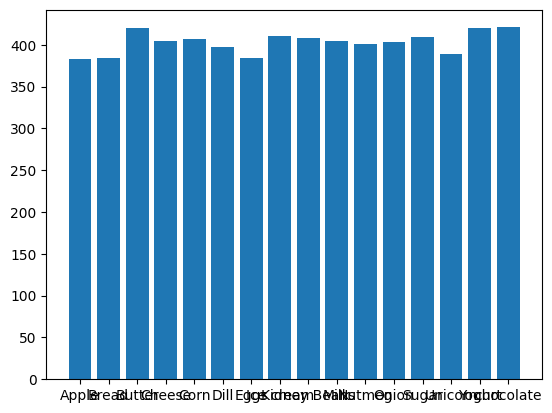

In [10]:
plt.bar(key,num)
plt.show()

In [11]:
index=0
max1=-99

In [12]:
for i in range(len(df)):     
  j=df.iloc[i].value_counts()
  if j[1]>max1:
    index=i
    max1=j[1]

C:\Users\mmeln\AppData\Local\Temp\ipykernel_6008\932281453.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if j[1]>max1:
C:\Users\mmeln\AppData\Local\Temp\ipykernel_6008\932281453.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max1=j[1]


In [13]:
print(df.iloc[index])


Apple           False
Bread           False
Butter           True
Cheese          False
Corn            False
Dill            False
Eggs             True
Ice cream        True
Kidney Beans     True
Milk             True
Nutmeg           True
Onion            True
Sugar           False
Unicorn         False
Yogurt           True
chocolate       False
Name: 6, dtype: bool


build model



In [14]:
apriori=apriori(df,min_support=0.2,use_colnames=True)


In [16]:
ruls=association_rules(apriori,min_threshold=0.1 , num_itemsets = None)


In [17]:
ruls=ruls[ruls['confidence']>0.49]
ruls=ruls.reset_index()
ruls

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,0,(Butter),(Ice cream),0.420420,0.410410,0.207207,0.492857,1.200889,1.0,0.034662,1.162571,0.288629,0.332263,0.139837,0.498868
1,1,(Ice cream),(Butter),0.410410,0.420420,0.207207,0.504878,1.200889,1.0,0.034662,1.170579,0.283728,0.332263,0.145722,0.498868
2,3,(Kidney Beans),(Butter),0.408408,0.420420,0.202202,0.495098,1.177626,1.0,0.030499,1.147905,0.254963,0.322684,0.128848,0.488025
3,6,(Cheese),(Kidney Beans),0.404404,0.408408,0.200200,0.495050,1.212143,1.0,0.035038,1.171583,0.293849,0.326797,0.146454,0.492623
4,7,(Kidney Beans),(Cheese),0.408408,0.404404,0.200200,0.490196,1.212143,1.0,0.035038,1.168284,0.295838,0.326797,0.144043,0.492623
5,8,(Ice cream),(chocolate),0.410410,0.421421,0.202202,0.492683,1.169098,1.0,0.029246,1.140467,0.245323,0.321145,0.123167,0.486246
6,10,(Milk),(chocolate),0.405405,0.421421,0.211211,0.520988,1.236263,1.0,0.040365,1.207857,0.321413,0.343089,0.172088,0.511088
7,11,(chocolate),(Milk),0.421421,0.405405,0.211211,0.501188,1.236263,1.0,0.040365,1.192021,0.330310,0.343089,0.161088,0.511088


predict model



In [18]:
def predict(ruls,k):
     result=set()
    
     for i in range(len(ruls)):
          antecedents=ruls['antecedents'][i]
          consequents=ruls['consequents'][i]
          if antecedents.issubset(k):
               result.update(consequents)
     result.difference_update(k)
     return   result

In [19]:
print(predict(ruls,{"Butter",'Milk','Kidney Beans'})) 


{'Cheese', 'chocolate', 'Ice cream'}
